In [1]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
#Reading the data by using pandas
data = pd.read_csv(r"C:\Data Science\Yuma\Data Source (sales_transactions).csv")

In [3]:
data.head()

,TransactionID,CustomerID,TransactionDate,ProductID,ProductCategory,Quantity,PricePerUnit,TotalAmount,TrustPointsUsed,PaymentMethod,DiscountApplied
0,1,1002.0,08-08-2024 22:00,2008,Grocery,1,10.0,10.0,20,Trust Points,5.0
1,2,NaN,07-08-2024 01:00,2004,Home Decor,1,10.0,10.0,0,Credit Card,20.0
2,3,1004.0,02-08-2024 19:00,2002,Grocery,3,30.0,90.0,0,Credit Card,25.0
3,2,1003.0,07-08-2024 17:00,2001,Toys,2,30.0,60.0,50,NaN,20.0
4,5,1001.0,09-08-2024 09:00,2008,Grocery,1,NaN,NaN,20,Trust Points,5.0


In [4]:
data.shape

(50, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    50 non-null     int64  
 1   CustomerID       45 non-null     float64
 2   TransactionDate  49 non-null     object 
 3   ProductID        50 non-null     int64  
 4   ProductCategory  50 non-null     object 
 5   Quantity         50 non-null     int64  
 6   PricePerUnit     36 non-null     float64
 7   TotalAmount      36 non-null     float64
 8   TrustPointsUsed  50 non-null     int64  
 9   PaymentMethod    40 non-null     object 
 10  DiscountApplied  45 non-null     float64
dtypes: float64(4), int64(4), object(3)
memory usage: 4.4+ KB


When first encountering the data, my initial focus was on identifying inconsistencies, such as missing values, negative numbers, and nan values. I then categorized these issues and formulated a plan to clean the data, focusing on retaining as much useful information as possible while ensuring the dataset was ready for analysis. My approach was systematic, starting with understanding the data, handling missing values, correcting errors, and performing consistency checks, all while considering the implications of each step on the quality of the final dataset.

In [6]:
data = data.dropna(subset=['CustomerID'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, 0 to 49
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    45 non-null     int64  
 1   CustomerID       45 non-null     float64
 2   TransactionDate  44 non-null     object 
 3   ProductID        45 non-null     int64  
 4   ProductCategory  45 non-null     object 
 5   Quantity         45 non-null     int64  
 6   PricePerUnit     31 non-null     float64
 7   TotalAmount      31 non-null     float64
 8   TrustPointsUsed  45 non-null     int64  
 9   PaymentMethod    35 non-null     object 
 10  DiscountApplied  40 non-null     float64
dtypes: float64(4), int64(4), object(3)
memory usage: 4.2+ KB


In [8]:
def quantity(x):
    return abs(x)
data['Quantity'] = data['Quantity'].apply(quantity)

In [9]:
mean_PricePerUnit = data.PricePerUnit.mean().round(0)
mean_TotalAmount = data.TotalAmount.mean().round(0)
data['PricePerUnit'] = data['PricePerUnit'].fillna(mean_PricePerUnit)
data['TotalAmount'] = data['PricePerUnit']*data['Quantity']

In [10]:
data['TransactionDate'] = data['TransactionDate'].ffill()

In [11]:
data['PaymentMethod']=data['PaymentMethod'].fillna(data['PaymentMethod'].mode()[0])

In [12]:
data['DiscountApplied'] = data['DiscountApplied'].fillna(0)

In [13]:
data['CustomerID'] = data['CustomerID'].astype(str).str[:4].astype(object)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, 0 to 49
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    45 non-null     int64  
 1   CustomerID       45 non-null     object 
 2   TransactionDate  45 non-null     object 
 3   ProductID        45 non-null     int64  
 4   ProductCategory  45 non-null     object 
 5   Quantity         45 non-null     int64  
 6   PricePerUnit     45 non-null     float64
 7   TotalAmount      45 non-null     float64
 8   TrustPointsUsed  45 non-null     int64  
 9   PaymentMethod    45 non-null     object 
 10  DiscountApplied  45 non-null     float64
dtypes: float64(3), int64(4), object(4)
memory usage: 4.2+ KB


In [15]:
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, 0 to 49
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    45 non-null     int64         
 1   CustomerID       45 non-null     object        
 2   TransactionDate  45 non-null     datetime64[ns]
 3   ProductID        45 non-null     int64         
 4   ProductCategory  45 non-null     object        
 5   Quantity         45 non-null     int64         
 6   PricePerUnit     45 non-null     float64       
 7   TotalAmount      45 non-null     float64       
 8   TrustPointsUsed  45 non-null     int64         
 9   PaymentMethod    45 non-null     object        
 10  DiscountApplied  45 non-null     float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(3)
memory usage: 4.2+ KB


In [17]:
data['Weekday'] = data['TransactionDate'].dt.day_name()

In [18]:
data = data.drop(columns=['TrustPointsUsed'])

In [19]:
data.head()

,TransactionID,CustomerID,TransactionDate,ProductID,ProductCategory,Quantity,PricePerUnit,TotalAmount,PaymentMethod,DiscountApplied,Weekday
0,1,1002,2024-08-08 22:00:00,2008,Grocery,1,10.0,10.0,Trust Points,5.0,Thursday
2,3,1004,2024-02-08 19:00:00,2002,Grocery,3,30.0,90.0,Credit Card,25.0,Thursday
3,2,1003,2024-07-08 17:00:00,2001,Toys,2,30.0,60.0,Cash,20.0,Monday
4,5,1001,2024-09-08 09:00:00,2008,Grocery,1,112.0,112.0,Trust Points,5.0,Sunday
5,6,1001,2024-09-08 09:00:00,2007,Home Decor,1,112.0,112.0,Credit Card,0.0,Sunday


In [20]:
def final_amount(row):
    x = row['TotalAmount']
    y = row['DiscountApplied']
    if y > 0:
        return round(x * (1 - y / 100), 2) 
    else:
        return x

data['Final_Amount'] = data.apply(final_amount, axis=1)


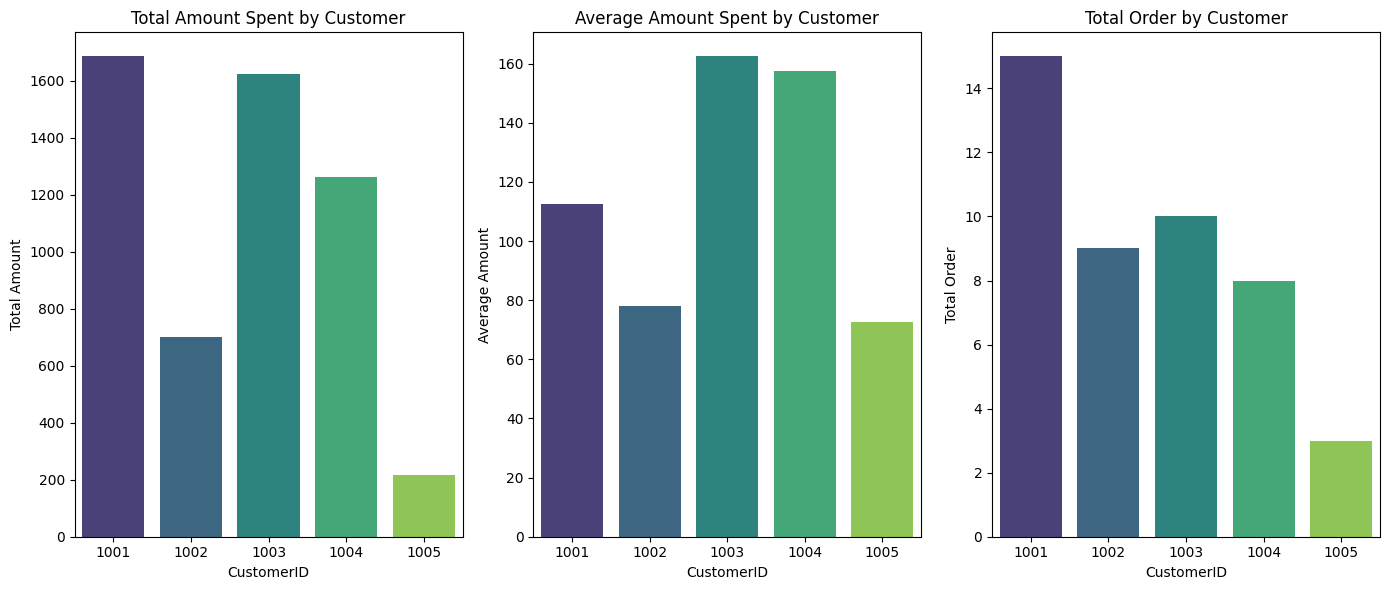

In [21]:
Total_customer_Sale = data.groupby('CustomerID')['Final_Amount'].agg(['sum', 'mean','count']).reset_index()
Total_customer_Sale.columns = ['CustomerID', 'Total_Spend', 'Avg_Spend','Total_Order']


plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1) 
sns.barplot(data=Total_customer_Sale, x='CustomerID', y='Total_Spend', palette='viridis')
plt.xlabel('CustomerID')
plt.ylabel('Total Amount')
plt.title('Total Amount Spent by Customer')


plt.subplot(1, 3, 2) 
sns.barplot(data=Total_customer_Sale, x='CustomerID', y='Avg_Spend', palette='viridis')
plt.xlabel('CustomerID')
plt.ylabel('Average Amount')
plt.title('Average Amount Spent by Customer')

plt.subplot(1, 3, 3) 
sns.barplot(data=Total_customer_Sale, x='CustomerID', y='Total_Order', palette='viridis')
plt.xlabel('CustomerID')
plt.ylabel('Total Order')
plt.title('Total Order by Customer')

plt.tight_layout()
plt.show()

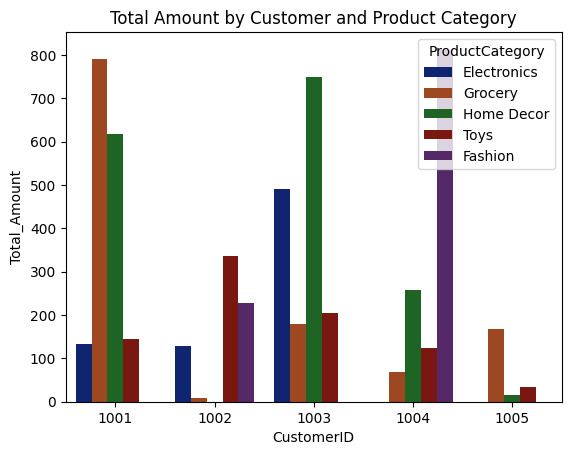

In [22]:
result = data.groupby(['CustomerID', 'ProductCategory'])['Final_Amount'].agg(['mean', 'sum']).reset_index()

result.columns = ['CustomerID', 'ProductCategory', 'Mean_Amount', 'Total_Amount']
result['Mean_Amount'] = result['Mean_Amount'].round(2)
result

sns.barplot(data = result,x = 'CustomerID',y = 'Total_Amount',hue= 'ProductCategory',palette='dark')
plt.title('Total Amount by Customer and Product Category')
plt.show()

In [23]:
week = data.groupby('Weekday')['Final_Amount'].sum().reset_index()
weekday_order = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}
week['Weekday_Num'] = week['Weekday'].map(weekday_order)
week_sorted = week.sort_values('Weekday_Num').reset_index(drop=True)
week_sorted = week_sorted.drop(columns='Weekday_Num')
week_sorted

,Weekday,Final_Amount
0,Monday,1595.3
1,Tuesday,28.5
2,Wednesday,750.0
3,Thursday,620.3
4,Friday,690.0
5,Saturday,532.1
6,Sunday,1275.8


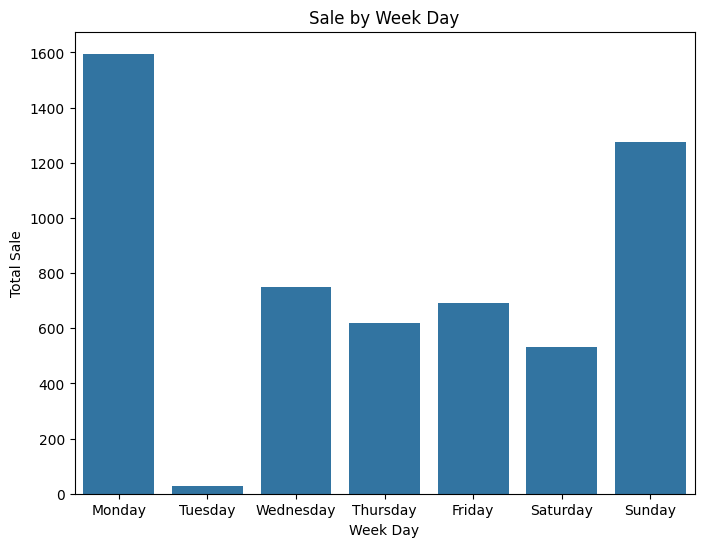

In [24]:
plt.figure(figsize=(8,6))
sns.barplot(data=week_sorted,x='Weekday',y ='Final_Amount')
plt.xlabel('Week Day')
plt.ylabel('Total Sale')
plt.title('Sale by Week Day')
plt.show()

In [25]:
data.head()

,TransactionID,CustomerID,TransactionDate,ProductID,ProductCategory,Quantity,PricePerUnit,TotalAmount,PaymentMethod,DiscountApplied,Weekday,Final_Amount
0,1,1002,2024-08-08 22:00:00,2008,Grocery,1,10.0,10.0,Trust Points,5.0,Thursday,9.5
2,3,1004,2024-02-08 19:00:00,2002,Grocery,3,30.0,90.0,Credit Card,25.0,Thursday,67.5
3,2,1003,2024-07-08 17:00:00,2001,Toys,2,30.0,60.0,Cash,20.0,Monday,48.0
4,5,1001,2024-09-08 09:00:00,2008,Grocery,1,112.0,112.0,Trust Points,5.0,Sunday,106.4
5,6,1001,2024-09-08 09:00:00,2007,Home Decor,1,112.0,112.0,Credit Card,0.0,Sunday,112.0


In [26]:
payment_total = data.groupby('PaymentMethod')['Final_Amount'].sum().reset_index()

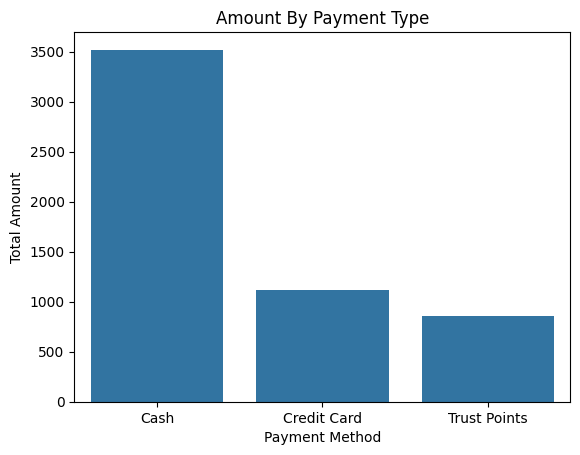

In [27]:
sns.barplot(data=payment_total,x = 'PaymentMethod', y ='Final_Amount')
plt.xlabel('Payment Method')
plt.ylabel('Total Amount')
plt.title('Amount By Payment Type')
plt.show()

In [28]:
data.head()

,TransactionID,CustomerID,TransactionDate,ProductID,ProductCategory,Quantity,PricePerUnit,TotalAmount,PaymentMethod,DiscountApplied,Weekday,Final_Amount
0,1,1002,2024-08-08 22:00:00,2008,Grocery,1,10.0,10.0,Trust Points,5.0,Thursday,9.5
2,3,1004,2024-02-08 19:00:00,2002,Grocery,3,30.0,90.0,Credit Card,25.0,Thursday,67.5
3,2,1003,2024-07-08 17:00:00,2001,Toys,2,30.0,60.0,Cash,20.0,Monday,48.0
4,5,1001,2024-09-08 09:00:00,2008,Grocery,1,112.0,112.0,Trust Points,5.0,Sunday,106.4
5,6,1001,2024-09-08 09:00:00,2007,Home Decor,1,112.0,112.0,Credit Card,0.0,Sunday,112.0


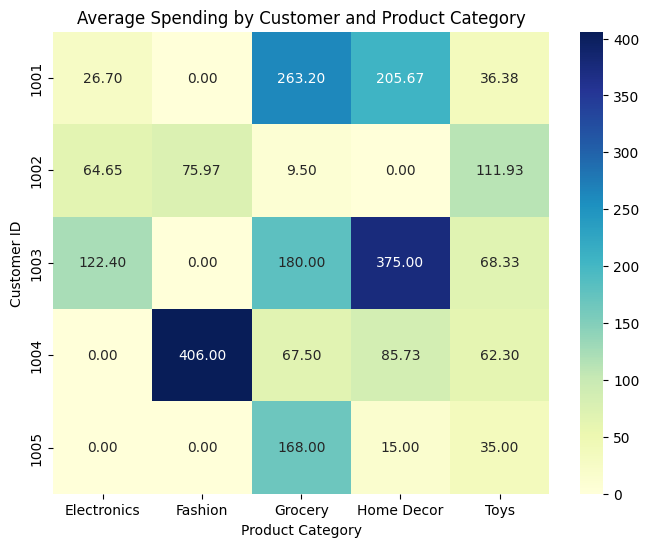

In [29]:
heatmap_data = (
    data.groupby(['CustomerID', 'ProductCategory'])['Final_Amount']
    .mean()
    .round(2)
    .unstack(fill_value=0)
)

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu")

plt.title("Average Spending by Customer and Product Category")
plt.xlabel("Product Category")
plt.ylabel("Customer ID")
plt.show()

Text(0.5, 1.0, 'Total Amount Spend by Date')

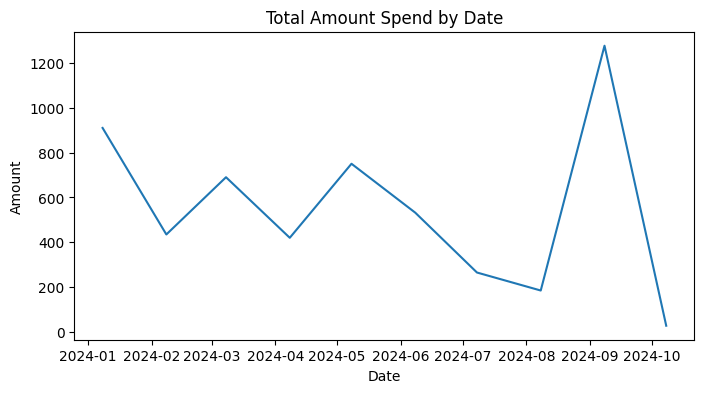

In [30]:
sorted_data = data[['TransactionDate', 'Final_Amount']].sort_values(by='TransactionDate')
sorted_data['Date'] = sorted_data['TransactionDate'].dt.date
sorted_data = sorted_data.groupby('Date')['Final_Amount'].sum().reset_index()

plt.figure(figsize=(8, 4))
sns.lineplot(data=sorted_data,x='Date', y = 'Final_Amount')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Total Amount Spend by Date')